# LA Bike Demand

- Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

- The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.



- 캐글에 들어가서 train데이터와 test데이터 다운받기:

https://www.kaggle.com/c/bike-sharing-demand



In [1]:
import pandas as pd

## Reload Dataset
-  이제 본격적으로 머신러닝을 통해 예측해보자

In [2]:
train = pd.read_csv("biketrain.csv", parse_dates=["datetime"])

print(train.shape)
train.head()

(10886, 12)


datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [3]:
test = pd.read_csv("biketest.csv", parse_dates=["datetime"])

print(test.shape)
test.head()

(6493, 9)


datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

## Preprocessing

### Parse datetime

In [4]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(10886, 19)


datetime  datetime-year  datetime-month  datetime-day  \
0 2011-01-01 00:00:00           2011               1             1   
1 2011-01-01 01:00:00           2011               1             1   
2 2011-01-01 02:00:00           2011               1             1   
3 2011-01-01 03:00:00           2011               1             1   
4 2011-01-01 04:00:00           2011               1             1   

   datetime-hour  datetime-minute  datetime-second  datetime-dayofweek  
0              0                0                0                   5  
1              1                0                0                   5  
2              2                0                0                   5  
3              3                0                0                   5  
4              4                0                0                   5

In [5]:
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

print(test.shape)
test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(6493, 16)


datetime  datetime-year  datetime-month  datetime-day  \
0 2011-01-20 00:00:00           2011               1            20   
1 2011-01-20 01:00:00           2011               1            20   
2 2011-01-20 02:00:00           2011               1            20   
3 2011-01-20 03:00:00           2011               1            20   
4 2011-01-20 04:00:00           2011               1            20   

   datetime-hour  datetime-minute  datetime-second  datetime-dayofweek  
0              0                0                0                   3  
1              1                0                0                   3  
2              2                0                0                   3  
3              3                0                0                   3  
4              4                0                0                   3

## Train
- 학습시킬때 넣을 특성을 잘 골라서 넣는것이 중요! 모든 컬럼을 다 넣는다고 절대 좋은 모델을 만들수가 없다!

In [6]:
feature_names = ["season", "holiday", "workingday", "weather",
                 "temp", "atemp", "humidity", "windspeed",
                 "datetime-year", "datetime-hour", "datetime-dayofweek"]

feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek']

- X_train, y_train, X_test, 그렇다면 y_test는? 우리가 맞춰야할 답. 즉 test데이터의 자전거 대여수임. 

In [7]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 11)


season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   datetime-year  datetime-hour  datetime-dayofweek  
0           2011              0                   5  
1           2011              1                   5  
2           2011              2                   5  
3           2011              3                   5  
4           2011              4                   5

In [8]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 11)


season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0       1        0           1        1  10.66  11.365        56    26.0027   
1       1        0           1        1  10.66  13.635        56     0.0000   
2       1        0           1        1  10.66  13.635        56     0.0000   
3       1        0           1        1  10.66  12.880        56    11.0014   
4       1        0           1        1  10.66  12.880        56    11.0014   

   datetime-year  datetime-hour  datetime-dayofweek  
0           2011              0                   3  
1           2011              1                   3  
2           2011              2                   3  
3           2011              3                   3  
4           2011              4                   3

In [9]:
label_name = "count"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

- 머신러닝 지도학습 알고리즘의 종류, 회귀문제를 풀수 있는 알고리즘들에 대한 소개
- 그중에서도 Decision Tree계열의 Random Froest의 장점!

In [11]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000,
                                  max_depth=9,
                                  random_state=37,
                                  n_jobs=-1)

- 파라미터들을 어떻게 설정해줘야 할까? 가장 최적의 파라미터 값을 찾아내야함!

In [81]:
import numpy as np
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
#     log_predict = predict + 1
#     log_actual = actual + 1
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)



그림출처: https://www.google.com/url?sa=i&source=images&cd=&cad=rja&uact=8&ved=2ahUKEwj_04b3ydjeAhUDjLwKHTa_AgsQjRx6BAgBEAU&url=https%3A%2F%2Ftowardsdatascience.com%2Ftrain-test-split-and-cross-validation-in-python-80b61beca4b6&psig=AOvVaw2eMrY06L4BaU5uBd8ojWUv&ust=1542446121506502



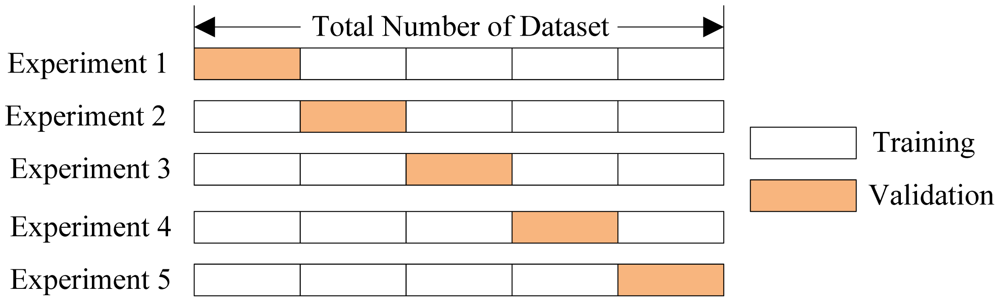

그림출처:https://www.google.com/url?sa=i&source=images&cd=&cad=rja&uact=8&ved=2ahUKEwiG7e2SytjeAhVDXLwKHZORCyIQjRx6BAgBEAU&url=https%3A%2F%2Fwww.kaggle.com%2Fdansbecker%2Fcross-validation&psig=AOvVaw2eMrY06L4BaU5uBd8ojWUv&ust=1542446121506502

In [84]:
from sklearn.cross_validation import cross_val_score

score = cross_val_score(model, X_train, y_train, cv=20, \
                        scoring=rmsle_scorer).mean()

print("Score = {0:.5f}".format(score))

Score = 0.44072


In [85]:
import numpy as np

In [12]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [86]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)


print(predictions.shape)
predictions

(6493,)


array([ 12.2562651 ,   5.52605532,   3.80085334, ..., 106.14351825,
        95.29298892,  61.3165873 ])

In [88]:
submission = pd.read_csv("data/sampleSubmission.csv")

submission["count"] = predictions

print(submission.shape)
submission.head()
submission.to_csv("baseline-script.csv", index=False)

(6493, 2)


- 파라미터를 최적화시켜서 점수를 올려보자!